**Questions to be answered in this jupyter notebook:**
- Question 1. During which time range in a year, do we have the most amount of referrals provided? 
   We can plan our job hunting time accordingly.
- Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

- Question 3. Who has created the largest amount of referrals?

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('referral_US.csv', encoding='utf-8')

In [3]:
df.shape

(4373, 7)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4373 non-null   datetime64[ns]
 1   Poster      4287 non-null   object        
 2   Replies     4373 non-null   int64         
 3   Views       4373 non-null   int64         
 4   post_id     4373 non-null   int64         
 5   post_title  4373 non-null   object        
 6   company     3839 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 188.0+ KB


In [6]:
df.head()

,Date,Poster,Replies,Views,post_id,post_title,company
0,2020-07-24,lajiaomian,1,199,654706,"IBM长期内推, 各种岗位均可, 全职实习, 仅需JobID, 个人姓名和邮箱",IBM
1,2020-07-23,ricepudding,5,666,654552,Wavely - BOSS直聘北美产品招后端（算法）工程师,Wavely
2,2020-07-23,gta345,4,439,654333,亚麻 我们组招SDE2,Amazon
3,2020-07-23,wnzcm,53,1836,654318,"[长期] Wish效率内推,各种ENG(有newgrad),DATA(有newgrad),P...",Wish
4,2020-07-23,tianbingleng,0,311,654287,[>= 2 yoe] [startup] 东部remote full time 职位(jav...,NaN


### Remove the post containing "求内推(asking for help)"

In [7]:
df['is_referral'] = df['post_title'].apply(lambda x :0 if '求' in x else 1)

In [8]:
df.head(5)

,Date,Poster,Replies,Views,post_id,post_title,company,is_referral
0,2020-07-24,lajiaomian,1,199,654706,"IBM长期内推, 各种岗位均可, 全职实习, 仅需JobID, 个人姓名和邮箱",IBM,1
1,2020-07-23,ricepudding,5,666,654552,Wavely - BOSS直聘北美产品招后端（算法）工程师,Wavely,1
2,2020-07-23,gta345,4,439,654333,亚麻 我们组招SDE2,Amazon,1
3,2020-07-23,wnzcm,53,1836,654318,"[长期] Wish效率内推,各种ENG(有newgrad),DATA(有newgrad),P...",Wish,1
4,2020-07-23,tianbingleng,0,311,654287,[>= 2 yoe] [startup] 东部remote full time 职位(jav...,NaN,1


In [9]:
# Remove the post requesting help.
df = df[df['is_referral']==1]; len(df)

3692

# - Question 1. During which time range in a year, do we have the most amount of referrals provided? 


## Lets count how many posts created for each day.

Text(0.5, 1.0, 'daily number of posts for all years')

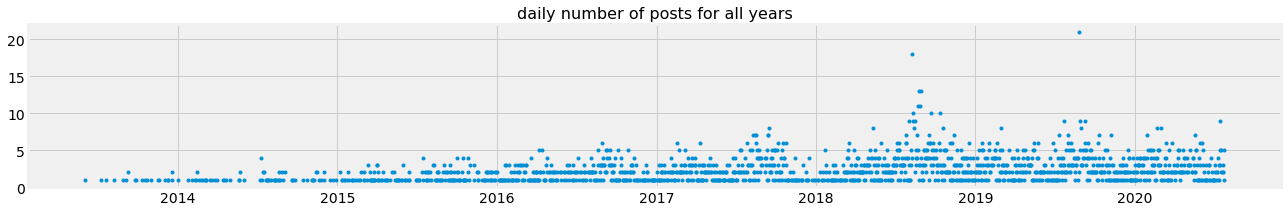

In [10]:
daily_count = df.groupby('Date').count()

plt.figure(figsize=(20,3))
plt.plot(daily_count['post_id'], marker='.', linestyle='')
# plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily number of posts for all years',fontsize=16)

Text(0.5, 1.0, 'daily counts of posts')

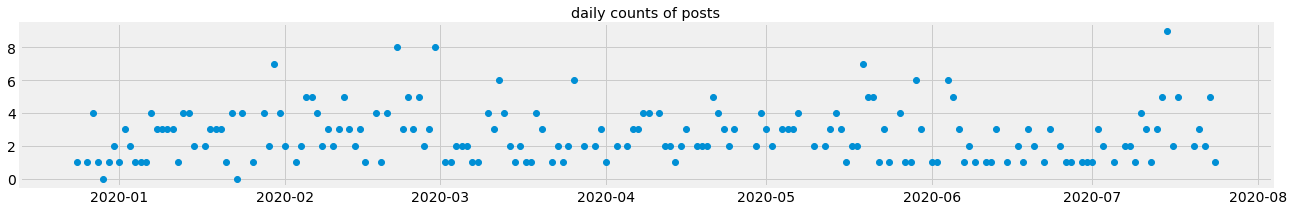

In [11]:
plt.figure(figsize=(20,3))
plt.plot(daily_count['2019-12-24':'2020-07-24'].index, daily_count['2019-12-24':'2020-07-24'].Poster, marker='o', linestyle='')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily counts of posts')

### Make weekly counts

In [12]:
df = df.set_index('Date')

Text(0.5, 1.0, 'Weekly counts of posts')

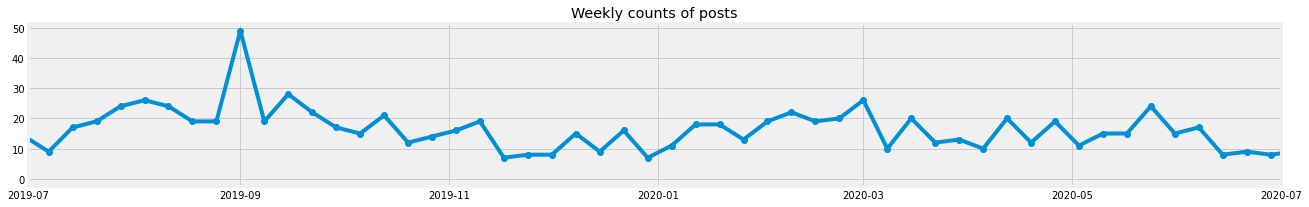

In [13]:
df_week_counts = df.resample('W').count() 

plt.figure(figsize=(20,3))
plt.xlim((pd.to_datetime('2019-07-01'), pd.to_datetime('2020-07-01')))
plt.plot(df_week_counts.index, df_week_counts.Poster, marker='o', linestyle='-')
plt.title('Weekly counts of posts')

### Make Monthly counts

Text(0.5, 1.0, 'Monthly counts of posts')

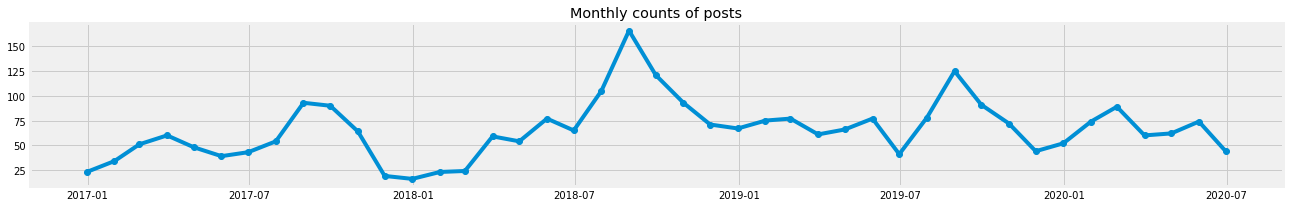

In [14]:
df_monthly_counts = df.resample('M').count() 

plt.figure(figsize=(20,3))
plt.plot(df_monthly_counts['2016-12-24':'2020-07-24'].index, df_monthly_counts['2016-12-24':'2020-07-24'].Poster, marker='o', linestyle='-')
plt.title('Monthly counts of posts')

#### We can see that the September is the peak month in the year for companies offering opportunities.

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

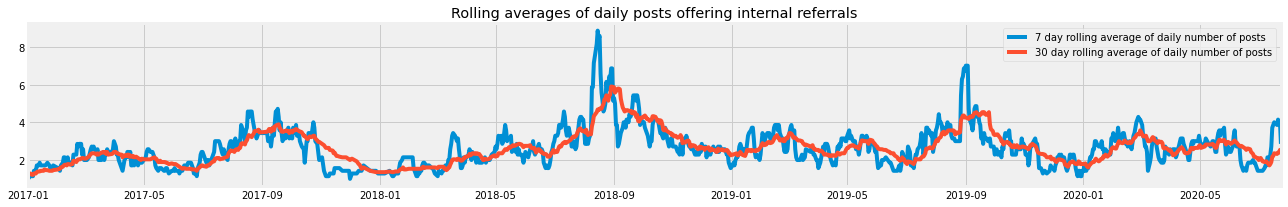

In [15]:
df_new = df.groupby('Date').count()

daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2017-01-01'), pd.to_datetime('2020-07-24')))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

## - Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

In [16]:
posts_per_company = df['company'].value_counts()[:20]; posts_per_company.head()

Amazon       643
Google       297
Facebook     252
Microsoft    109
Uber          89
Name: company, dtype: int64

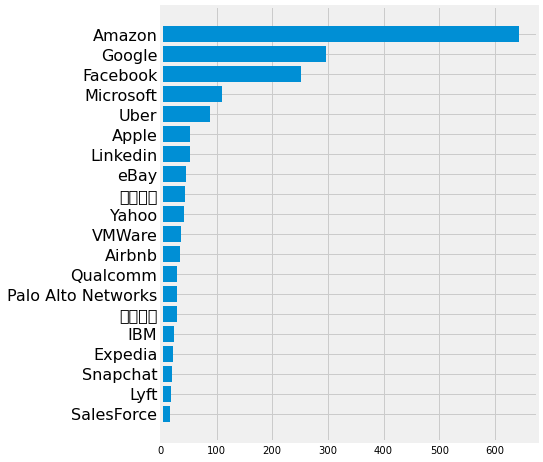

In [17]:
plt.figure(figsize=(6,8))
plt.barh(posts_per_company.index, posts_per_company.values)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()

## - Question 3. Who has created the largest amount of referrals?
### Top ten author ordered by number of posts and average views

In [18]:
poster_info = df.groupby(['Poster']).agg({'Views': ['count','sum', 'mean', 'min', 'max'], 'Replies': ['mean', 'min', 'max']})
poster_info.columns = ['_'.join(x) for x in poster_info.columns.ravel()]
poster_info.sort_values(by=['Views_count', 'Views_mean'], ascending=False).head(10)

,Views_count,Views_sum,Views_mean,Views_min,Views_max,Replies_mean,Replies_min,Replies_max
Poster,,,,,,,,
amazreferal,24,86796,3616.500000,767,14494,36.625000,3,247
鸟月月,13,119752,9211.692308,4719,17509,130.769231,60,317
lindaxia2003,13,47299,3638.384615,1614,7618,27.461538,0,68
wanghwadad,12,97932,8161.000000,2343,32185,121.416667,19,678
斯卡洛夫斯基,12,52378,4364.833333,1855,8501,12.333333,2,48
地里小马甲,12,37134,3094.500000,989,8812,23.583333,0,109
GetBusyLiving,11,32613,2964.818182,439,7169,29.818182,1,98
Warald,10,123419,12341.900000,1818,35615,33.900000,0,169
niyanwen212,9,56889,6321.000000,2725,11903,70.111111,15,144
